In [ ]:
### coding:utf-8
import os
import pandas as pd
import threading
from model_modflow import model_modflow as modflow
from model_modpath import model_modpath as modpath
from model_seawat import model_seawat as seawat
from vtk_export_grid import vtk_export_grid as vtk_grid
from vtk_export_watertable import vtk_export_watertable as vtk_watertable
from vtk_export_pathlines import vtk_export_pathlines as vtk_pathlines
from IPython.core.debugger import set_trace as st

########################################################################################################################
#                                                      MODEL SETTINGS                                                  #
########################################################################################################################

# FOLDER
filename = r'C:/Users/alexa/Dropbox/DEM/'

site_number = [1] #Select site number
permeability = [0.864]
theta = [0.01]
geology = [0]
time = [0.001]
thick = [50]

def setting(site_number,permeability, time, geology, theta, thick):
    # STUDY SITES
    sites = pd.read_csv(filename+"study_sites.txt", sep='\s+', header=0, index_col=0)
    site = sites.to_numpy()
    coordinates = site[site_number,1:5]
    port=int(site[site_number,5])
    # TIME DISCRETIZATION
    time_param = time  # 0: chronicle | 1: mean (1 day Steady State) | 2: min (1 day SS) | 3: max (1 day SS) | 4: 7 periods (R/4 R/2 R 2R 4R 6R 8R) | or values of recharge (1 SS)

    # STRUCTURE
    geology_param = geology  # 0: homogeneous geology | 1: heterogeneous geology
    permeability_param = permeability  # m/d | only if geology_param = 0
    theta_param = theta # Porosity in %
    thickness_param = thick  # 0: homogeneous thickness | 1: flat bottom (heterogeneous thickness) | or values of thicknesse

    # MODEL NAME
    sitename = sites.index._data[site_number] + '/'
    modelname = r'model_' + 'time_' + str(time_param) + '_geo_' + str(geology_param) + '_thick_' + str(thickness_param)
    if geology_param == 0:
        modelname = modelname + '_K_' + str(permeability_param) + '_Sy_' + str(theta_param)
    sitefolder = filename + sitename 
    modelfolder =filename + sitename + modelname + '/'
    
    import model_modflow_calibration as mc
    model = mc.calibration(site_number,filename, 'Calibration', filename + sitename + 'Calibration', sitefolder, coordinates, port)
    '''st()
    # SIMULATION
    modflow_param = 1 # 0: disabled | 1: enabled
    seawat_param = 0  # 0: disabled | 1: enabled
    if time ==4 or time==1 or time not in [0,1,2,3,4]:
        modpath_param= 1  # 0: disabled | 1: enabled
    else:
        modpath_param = 0
        
    # VTK OUTPUT
    grid = 0  # 0: disabled | 1: enabled
    watertable = 0 # 0: disabled | 1: enabled
    pathlines = 0 # 0: disabled | 1: enabled

    # CREATE AND RUN MODFLOW MODEL - SEAWAT MODEL - MODPATH MODEL
    if modflow_param == 1:
        modflow(site_number=site_number,filename=filename, modelname=modelname, modelfolder=modelfolder,
                coord=coordinates, tdis=time_param, geo=geology_param,
                permea=permeability_param, thick=thickness_param, port=int(site[site_number,5]), porosity=theta_param)
    if seawat_param == 1:
        seawat(filename=filename,modelfolder=filename + site_name + model_folder, modelname=model_name)
    if modpath_param == 1:
        modpath(filename=filename, modelname=model_name, modelfolder=filename + site_name + model_folder)

    # CREATE OUTPUT FILES
    if not os.path.exists(filename + site_name + model_folder + 'output_files'):
        os.makedirs(filename + site_name + model_folder + 'output_files')
    if grid == 1:
        vtk_grid(modelname=model_name, modelfolder=filename + site_name + model_folder, coord=coordinates)
    if watertable == 1:
        vtk_watertable(modelname=model_name, modelfolder=filename + site_name + model_folder, coord=coordinates)
    if pathlines == 1:
        vtk_pathlines(modelname=model_name, modelfolder=filename + site_name + model_folder, coord=coordinates)
    '''   
compt=0
coeur=8
for sim in range (0, len(permeability)):
    compt += 1
    t = threading.Thread(target=setting, args=(site_number[sim], permeability[sim], time[sim], geology[sim], theta[sim], thick[sim]))
    t.start()
    if int(compt / coeur) == compt / coeur:  # Si compt est multiple de 3
        t.join()  # alors on attend que les modèles soient terminées pour recommencer
        print(compt)
t.join() # On attend que les modèles soient finis pour terminer le calcul

In [ ]:
### coding:utf-8
import os
import pandas as pd
import threading
from model_modflow import model_modflow as modflow
from model_modpath import model_modpath as modpath
from model_seawat import model_seawat as seawat
from vtk_export_grid import vtk_export_grid as vtk_grid
from vtk_export_watertable import vtk_export_watertable as vtk_watertable
from vtk_export_pathlines import vtk_export_pathlines as vtk_pathlines
from IPython.core.debugger import set_trace as st
# FOLDER
filename = r'C:/Users/alexa/Dropbox/DEM/'
site_number = 1 #Select site number
# STUDY SITES
sites = pd.read_csv(filename+"study_sites.txt", sep='\s+', header=0, index_col=0)
site = sites.to_numpy()
coordinates = site[site_number,1:5]
port=int(site[site_number,5])
# MODEL NAME
sitename = sites.index._data[site_number] + '/'   
sitefolder = filename + sitename 

flopy is installed in C:\Users\alexa\miniconda3\envs\model\lib\site-packages\flopy

Key, Value
I740,1



Key, Value
I740,1
> c:\users\alexa\dropbox\dem\model_modflow_calibration.py(148)get_fuzzy()
    146         '''
    147         st()
--> 148         if np.isnan(np.sum(head))==True:
    149             paramList = [-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999]
    150         else:



ipdb>  figure(self.structure.geology)


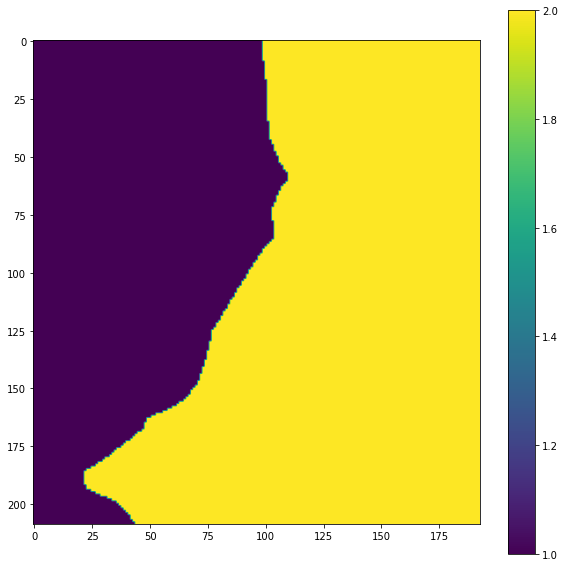

ipdb>  self_site_number


*** NameError: name 'self_site_number' is not defined


ipdb>  self.site_number


'I740/'


ipdb>  self.number_structure


array([1, 2])


In [ ]:
import model_modflow_calibration as mc
model = mc.calibration('I740')
model.run_calibration()

In [ ]:
import model_modflow_calibration as mc
model = mc.calibration('I740')
model.run_best_model()

In [ ]:
import get_geological_structure as ggs
ggs.structure('I740')


Key, Value
I740,1


C:\Users\alexa\Dropbox\DEM\model_modflow_calibration.py:293: MatplotlibDeprecationWarning: The 'norm' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  #plt.plot(allParams[:,0], allParams[:,1],'+')
C:\Users\alexa\Dropbox\DEM\model_modflow_calibration.py:285: UserWarning: No contour levels were found within the data range.
  im = ax[i].tricontourf(allParams[:,0], allParams[:,1], allFuzzy[:,i], cmap='jet', levels=np.linspace(0,1,22))
C:\Users\alexa\Dropbox\DEM\model_modflow_calibration.py:288: UserWarning: No contour levels were found within the data range.
  im = ax[i].tricontourf(allParams[:,0], allParams[:,1], Si_Sm , cmap='jet', levels=np.linspace(0,1,22),)
C:\Users\alexa\Dropbox\DEM\model_modflow_calibration.py:291: UserWarning: No contour levels were found within the data range.
  im = ax[i].tricontourf(allParams[:,0], allParams[:,1], Ni_Nm, cmap='jet', levels=np.linspace(0,1,22),

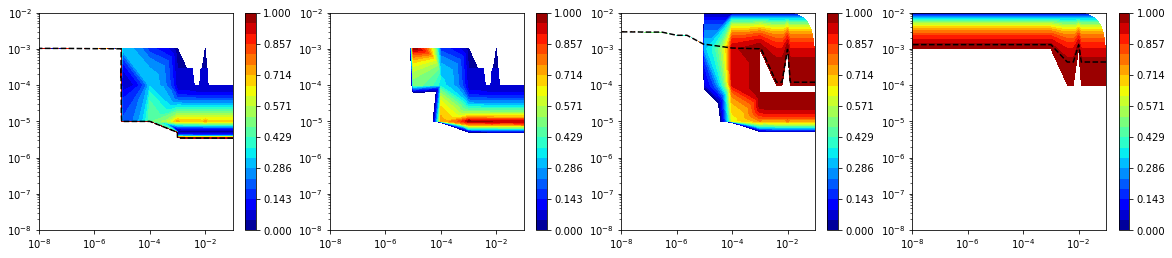

In [3]:
import model_modflow_calibration as mc
model = mc.calibration('I740')
model.display_Fuzzy()

In [ ]:
model.fuzzy

In [ ]:
import model_modflow_calibration as mc
model = mc.calibration('I740')
model.extract_best_temp_model()

flopy is installed in C:\Users\alexa\miniconda3\envs\model\lib\site-packages\flopy

Key, Value
I740,1
> c:\users\alexa\dropbox\dem\model_modflow_calibration.py(47)extract_best_temp_model()
     45         paramValues_Ea = self.logParamValues[(self.fuzzy[:,1]>0.50) & (self.fuzzy[:,1]<1)]
     46         st()
---> 47         index = (np.abs(fuzzy_Ea[:,0]-1)).argmin()
     48         self.predictParamValues = paramValues_Ea[index]
     49         print(fuzzy_Ea[index,0], fuzzy_Ea[index,1],self.predictParamValues)



ipdb>  fuzzy_Ea


array([], shape=(0, 8), dtype=float64)


ipdb>  self.fuzzy


array([[-9999., -9999., -9999., -9999., -9999., -9999., -9999., -9999.],
       [-9999., -9999., -9999., -9999., -9999., -9999., -9999., -9999.],
       [-9999., -9999., -9999., -9999., -9999., -9999., -9999., -9999.],
       [-9999., -9999., -9999., -9999., -9999., -9999., -9999., -9999.],
       [-9999., -9999., -9999., -9999., -9999., -9999., -9999., -9999.],
       [-9999., -9999., -9999., -9999., -9999., -9999., -9999., -9999.],
       [-9999., -9999., -9999., -9999., -9999., -9999., -9999., -9999.],
       [-9999., -9999., -9999., -9999., -9999., -9999., -9999., -9999.],
       [-9999., -9999., -9999., -9999., -9999., -9999., -9999., -9999.],
       [-9999., -9999., -9999., -9999., -9999., -9999., -9999., -9999.],
       [-9999., -9999., -9999., -9999., -9999., -9999., -9999., -9999.],
       [-9999., -9999., -9999., -9999., -9999., -9999., -9999., -9999.],
       [-9999., -9999., -9999., -9999., -9999., -9999., -9999., -9999.],
       [-9999., -9999., -9999., -9999., -9999., -99